# 문자열 데이터를 숫자형으로 바꿔주는 방법 LabelEncoder

In [ ]:
import pandas as pd

In [4]:
df = pd.DataFrame({'A' : ['a', 'b', 'c', 'a', 'b'],
                   'B' : [1,2,3,1,0]})
df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # 엔코더 모델 객체 생성 선언
le.fit(df['A']) # 학습해라

LabelEncoder()

In [7]:
# 학습된 내용 확인
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [8]:
# 원하는 라벨로 변환하자

le.transform(df['A'])

array([0, 1, 2, 0, 1])

In [9]:
# 라벨링 컬럼을 추가해보자

df['Label_A'] = le.transform(df['A'])
df

,A,B,Label_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [10]:
# fit과 변환을 한번에
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [11]:
# 라벨을 다시 문자열로

le.inverse_transform(df['Label_A'])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

# min - max scaling

In [12]:
df = pd.DataFrame({'A' : [10, 20, -10, 0, 25],
                   'B' : [1,2,3,1,0]})
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler() # 객체 선언
mms.fit(df) # 학습

MinMaxScaler()

In [17]:
# 학습결과
mms.data_max_, mms.data_min_, mms.data_range_ 

(array([25.,  3.]), array([-10.,   0.]), array([35.,  3.]))

In [19]:
# 스케일링한 새로운 데이터프레임 생성

df_mms = pd.DataFrame(mms.transform(df))
df_mms

,0,1
0,0.571429,0.333333
1,0.857143,0.666667
2,0.000000,1.000000
3,0.285714,0.333333
4,1.000000,0.000000


In [20]:
# 반환 시키기

mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

In [22]:
# fit과 변환 한번에
mms.fit_transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

# Standard Scaler 평균=0, 표준 편차= 1 인 정규분포로 변환

In [23]:
df = pd.DataFrame({'A' : [10, 20, -10, 0, 25],
                   'B' : [1,2,3,1,0]})
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 객체 선언
ss.fit(df) # 학습

StandardScaler()

In [25]:
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [26]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [27]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

# Robust Scaler 

In [28]:
df = pd.DataFrame({'A' : [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.1, 5.]})
df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.1
7,5.0


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [30]:
df_scaler = df.copy()

df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

In [31]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.610644,-0.7
1,0.0,0.019608,-0.548013,-0.5
2,0.1,0.039216,-0.485383,-0.3
3,0.2,0.058824,-0.422753,-0.1
4,0.3,0.078431,-0.360123,0.1
5,0.4,0.098039,-0.297493,0.3
6,1.1,0.235294,0.140918,1.7
7,5.0,1.000000,2.583492,9.5


- 이해가 되지않을 땐 그래프로~~ 

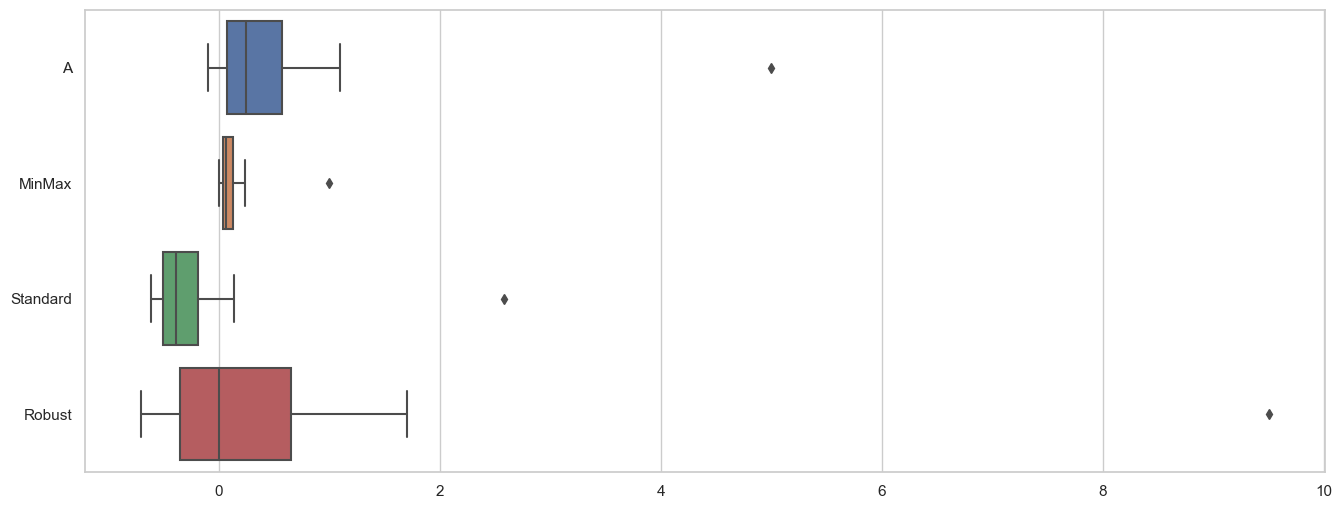

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

plt.figure(figsize=(16,6))
sns.boxplot(data=df_scaler, orient='h');

- 위 3개의 차이, 방법 알아두면 좋을 것이다.